# Classification Using Scikit-learn

In this homework you will learn how to build a basic supervised learning algorithm (classification) using the most popular Python machine learning library, scikit-learn. You will follow the 3 canonical steps for building a model:

1) Data preparation
2) Model fitting
3) Model evaluation & selection

We will use the World Happiness Report (WHR) data, bringing in some additional information that will enable us to formulate a classification problem to predict categorical labels on the dataset.

# Data Preparation

Execute the code cell below to import some modules and read in and preprocess the WHR data.  The last line in the code cell below returns the head of the basic WHR dataframe, to show you what is in that dataset.

In [ ]:


# Load the xls dataset.

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Update the file path to point to your Google Drive location
file_path = '/content/drive/MyDrive/Colab Notebooks/WHR2018Chapter2OnlineData.xls'
dfraw = pd.read_excel(file_path, sheet_name='Table2.1')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')
cols_to_include = ['country', 'year', 'Life Ladder',
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth',
                   'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness',
            'Log GDP per capita': 'LogGDP',
            'Social support': 'Support',
            'Healthy life expectancy at birth': 'Life',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Corruption',
            'Positive affect': 'Positive',
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
key_vars = ['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']

print(df.head(2))



       country  year  Happiness  Positive  Negative   LogGDP   Support  \
0  Afghanistan  2008   3.723590  0.517637  0.258195  7.16869  0.450662   
1  Afghanistan  2009   4.401778  0.583926  0.237092  7.33379  0.552308   

        Life   Freedom  Generosity  Corruption  
0  49.209663  0.718114    0.181819    0.881686  
1  49.624432  0.678896    0.203614    0.850035  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1562 non-null   object 
 1   year        1562 non-null   int64  
 2   Happiness   1562 non-null   float64
 3   Positive    1544 non-null   float64
 4   Negative    1550 non-null   float64
 5   LogGDP      1535 non-null   float64
 6   Support     1549 non-null   float64
 7   Life        1553 non-null   float64
 8   Freedom     1533 non-null   float64
 9   Generosity  1482 non-null   float64
 10  Corruption  1472 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 134.4+ KB


In [ ]:
df.describe()

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
count,1562.000000,1562.000000,1544.000000,1550.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000
mean,2011.820743,5.433676,0.708969,0.263171,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622
std,3.419787,1.121017,0.107644,0.084006,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538
min,2005.000000,2.661718,0.362498,0.083426,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198
25%,2009.000000,4.606351,0.621471,0.204116,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359
50%,2012.000000,5.332600,0.717398,0.251798,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115
75%,2015.000000,6.271025,0.800858,0.311515,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089
max,2017.000000,8.018934,0.943621,0.704590,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276


In [ ]:
df.sample()


,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
1294,Sri Lanka,2006,4.344611,0.756676,0.21633,8.850014,0.863599,64.207062,0.723848,0.056387,0.837785


### Step 1.

First, we will augment the core WHR dataset to bring in some additional information that is included in a different worksheet.  Since this is mostly about data processing rather than machine learning, simply execute the next two code cells below.  But study each line of code and the associated comments, and then examine the head of the new dataframe named ```df2``` to understand what has been done.

In [ ]:
# read in data from SupportingFactors worksheet into a new dataframe dfsupp

dfsupp = pd.read_excel(file_path, sheet_name='SupportingFactors')

# extract out region information from SupportingFactors dataframe
regions = dfsupp[['country', 'Region indicator']].rename({'Region indicator': 'region'}, axis=1)

# examine head of regions dataframe -- each country has an associated world region
regions.head()
df=dfraw.copy()

In [ ]:
# compute the mean values of all the WHR data for each country, averaging over all years in the dataset
dfmean = df.groupby('country').mean().drop('year', axis=1)

# merge the mean WHR data with the region information extracted previously
df2 = pd.merge(dfmean, regions, on='country').dropna()

# set the index of df2 to be the country name
df2.set_index('country', inplace=True)

# examine head of df2 dataframe -- mean WHR values for each country, along with associated regions
print(df2.head(5))

           Life Ladder  Log GDP per capita  Social support  \
country                                                      
Albania       4.988791            9.247059        0.723204   
Argentina     6.406131            9.826051        0.906080   
Armenia       4.386683            8.906013        0.705386   
Australia     7.309089           10.653220        0.949283   
Austria       7.234409           10.696035        0.928381   

           Healthy life expectancy at birth  Freedom to make life choices  \
country                                                                     
Albania                           68.027213                      0.626155   
Argentina                         66.764205                      0.753122   
Armenia                           64.165676                      0.520092   
Australia                         72.074265                      0.924021   
Austria                           71.178088                      0.906110   

           Generosity  Pe

### Step 2.

This new dataframe ```df2``` is what we want to use for our machine learning task.  For each country in the dataset, we have a set of numerical values ('Happiness', 'Positive', 'Negative', etc., which are all listed in the variable ```key_vars```) and a categorical value ('region').  We would like to know if the raw numerical data are  predictive of the region.  In other words, if someone gave you a set of numerical data on Happiness, etc. for an unknown country, would you be able to predict what region of the world it might be located in?  This is an example of classification, where we will train a model based on the numerical data and the associated labels (regions).

In order to proceed, we first want to extract and process some data from our ```df2``` dataframe.  We need to separate the data into two parts:
* the region data that we want to be able to predict (we'll call it ```y```)
* the WHR numerical data that we want to use as input to our prediction (we'll call it ```x```)

Again, our goal is to build a classifier that we will train on a subset of the WHR numerical data (x) and the region data (y), so that we can predict regions from data for countries that we have not trained our model on.

In the code cell below:
* Extract the subset of ```df2``` associated with the columns in ```key_vars``` and assign it to the variable ```x```.
* Extract the subset of ```df2``` associated with the region column, and assign it to the variable ```y```.
* Print the shape of both `x` and `y`.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [ ]:
# df2 is what we want to use for our machine learning task with following feature set
renaming = {'Life Ladder': 'Happiness',
            'Log GDP per capita': 'LogGDP',
            'Social support': 'Support',
            'Healthy life expectancy at birth': 'Life',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Corruption',
            'Positive affect': 'Positive',
            'Negative affect': 'Negative'}

# Rename the columns in df2 using the renaming dictionary
df2 = df2.rename(columns=renaming)

key_vars = ['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']
x = df2[key_vars]

print("\n Column names in the dataframe:\n ")
for col in key_vars:
    print(col)
print("\n")
y = df2['region']

print(f"Shape of x--------> : {x.shape}\n")
print(f"Shape of y-------->: {y.shape}\n")

x.columns


 Column names in the dataframe:
 
Happiness
LogGDP
Support
Life
Freedom
Generosity
Corruption
Positive
Negative


Shape of x--------> : (116, 9)

Shape of y-------->: (116,)



Index(['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity',
       'Corruption', 'Positive', 'Negative'],
      dtype='object')

In [ ]:
df2.tail()

,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year",region
country,,,,,,,,,,,,,,,,,,
Venezuela,6.414997,9.706075,0.925062,64.120754,0.682923,-0.192087,0.782355,0.823428,0.219652,0.432210,-1.010620,-1.413626,2.345499,0.378843,0.4965,0.497167,0.333107,Latin America and Caribbean
Vietnam,5.293268,8.477400,0.827200,65.357492,0.871811,0.019168,0.781401,0.631631,0.209818,0.848363,-0.625644,-0.441926,1.555171,0.294772,0.3624,0.364286,0.446754,Southeast Asia
Yemen,3.969106,8.191046,0.721817,54.056593,0.626482,-0.132600,0.833238,0.536306,0.299466,0.403448,-1.888195,-1.154295,2.217152,0.569409,0.3670,0.357000,0.417854,Middle East and North Africa
Zambia,4.685380,8.095450,0.745987,49.643073,0.749263,-0.008872,0.831900,0.722792,0.275567,0.554312,0.104841,-0.475436,2.307785,0.499452,0.5585,0.527400,0.601957,Sub-Saharan Africa
Zimbabwe,4.064211,7.415946,0.811693,46.415665,0.564987,-0.064208,0.849916,0.719749,0.214457,0.448324,-1.154359,-1.568579,2.037725,0.515621,0.4320,0.432000,0.579647,Sub-Saharan Africa


### Step 3.

You should see that the shape of ```x``` is (152, 9) and the shape of ```y``` is (152,).  There are 152 samples (countries), and 9 features (each of the key_vars) that we are using to make predictions.

Note that the numerical data columns in ```x``` represent different quantities and have different scales. A key step in machine learning is _standardization_: the transformation of features to be on the same scale (with a mean of 0 and a standard deviation of 1). Standardization can substantially increase model accuracy, performance and interpretability.

`sklearn` provides various utilities to perform standardization.  We will use one here called ```StandardScaler```, which will transform a data set so that each resulting column has zero mean and unit standard deviation.

Carrying out this scaling is a little complicated if we want to maintain the basic structure of our dataframe, so we have provided the relevant code in the next code cell below.  (The code examples describing StandardScaler in the [sklearn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) typically just extract out the numerical values in numpy arrays. For this exercise, we'd like to keep the labels together in a dataframe.)

Please perform the following steps in the below graded cell:
* Import the `StandardScaler` object
* Create and fit a `StandardScaler` object to our dataframe ```x```
* Create a new dataframe ```x_scaled``` that contains the scaled (transformed) data, using the column and index labels from our unscaled dataframe ```x```
* Print out the mean and standard deviation of each column of ```x_scaled```
* Peek at the head of the new dataframe ```x_scaled```

In examining the output, check that the means of each column have been scaled to nearly zero (to within a very small tolerance) and the standard deviations have been scaled to one. Some of the very small numbers might be printed out in scientific notation, where a number like ```1.928282e-16``` means ```1.928282 * 10**(-16)```.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [ ]:
# Step 1:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Step 2:
# Create and fit the StandardScaler to our dataframe x
scaler = StandardScaler()
scaler.fit(x)

# Step 3:
# Create a new dataframe x_scaled that contains the scaled (transformed) data,
# using the column and index labels from our unscaled dataframe x
x_scaled_values = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_values, columns=x.columns, index=x.index)

# Step 4:
# Print out the mean and standard deviation of each column of x_scaled
print("Means of each column in x_scaled:")
print(x_scaled.mean())

print("\nStandard deviations of each column in x_scaled:")
print(x_scaled.std())

# Step 5: Peek at the head of the new dataframe x_scaled
print("\nFirst few rows of the scaled dataframe x_scaled:")
print(x_scaled.head())

#
## Step 6: Peek at the tail of the new dataframe x_scaled
print("\nFirst few rows of the scaled dataframe x_scaled:")
print(x_scaled.tail())

Means of each column in x_scaled:
Happiness    -2.431006e-16
LogGDP       -1.600252e-15
Support      -7.224675e-16
Life          5.742533e-17
Freedom       3.560370e-16
Generosity    1.292070e-17
Corruption   -1.598338e-16
Positive      1.132236e-15
Negative      5.847813e-16
dtype: float64

Standard deviations of each column in x_scaled:
Happiness     1.004338
LogGDP        1.004338
Support       1.004338
Life          1.004338
Freedom       1.004338
Generosity    1.004338
Corruption    1.004338
Positive      1.004338
Negative      1.004338
dtype: float64

First few rows of the scaled dataframe x_scaled:
           Happiness    LogGDP   Support      Life   Freedom  Generosity  \
country                                                                    
Albania    -0.416649  0.051829 -0.805820  0.717102 -0.800055   -0.670661   
Argentina   0.879166  0.545301  0.850069  0.560252  0.208629   -0.987485   
Armenia    -0.967131 -0.238842 -0.967155  0.237548 -1.642675   -1.230426   
Austral

**Interpretation**:

Albania has a value of -0.416649, meaning its Happiness score is slightly below the mean (by about 0.42 standard deviations).

Australia has a value of 1.704704, indicating its Happiness score is significantly above the mean (by about 1.7 standard deviations).

1. Means of Each Column:
The means of all columns are very close to zero (e.g., -2.431006e-16 for "Happiness"), which indicates that the StandardScaler has successfully standardized the data.

2. Standard Deviations of Each Column:
The standard deviations for all columns are approximately 1.004338. This is also expected behavior after standardization, as the StandardScaler transforms each feature to have a standard deviation of 1. The small deviation from exactly 1 is due to numerical precision.

In [ ]:
## Step 5: Peek at the head of the new dataframe x_scaled
print("\nHead few rows of the scaled dataframe x_scaled:")
x_scaled.tail()


Head few rows of the scaled dataframe x_scaled:


,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
country,,,,,,,,,
Venezuela,0.887272,0.443046,1.021945,0.231969,-0.349065,-1.227659,0.116917,1.137707,-0.689109
Vietnam,-0.138278,-0.604147,0.135831,0.385556,1.151551,0.123809,0.111227,-0.728977,-0.836195
Yemen,-1.348904,-0.848205,-0.818373,-1.017871,-0.797464,-0.847104,0.420471,-1.656743,0.504645
Zambia,-0.694045,-0.929681,-0.599520,-1.565973,0.177975,-0.055576,0.412489,0.158258,0.147198
Zimbabwe,-1.261954,-1.508819,-0.004575,-1.966776,-1.286003,-0.409575,0.519964,0.128639,-0.766814


In [ ]:
## Step 6: Peek at the tail of the new dataframe x_scaled
print("\nLast few rows of the scaled dataframe x_scaled:")
x_scaled.tail()


Last few rows of the scaled dataframe x_scaled:


,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
country,,,,,,,,,
Venezuela,0.887272,0.443046,1.021945,0.231969,-0.349065,-1.227659,0.116917,1.137707,-0.689109
Vietnam,-0.138278,-0.604147,0.135831,0.385556,1.151551,0.123809,0.111227,-0.728977,-0.836195
Yemen,-1.348904,-0.848205,-0.818373,-1.017871,-0.797464,-0.847104,0.420471,-1.656743,0.504645
Zambia,-0.694045,-0.929681,-0.599520,-1.565973,0.177975,-0.055576,0.412489,0.158258,0.147198
Zimbabwe,-1.261954,-1.508819,-0.004575,-1.966776,-1.286003,-0.409575,0.519964,0.128639,-0.766814


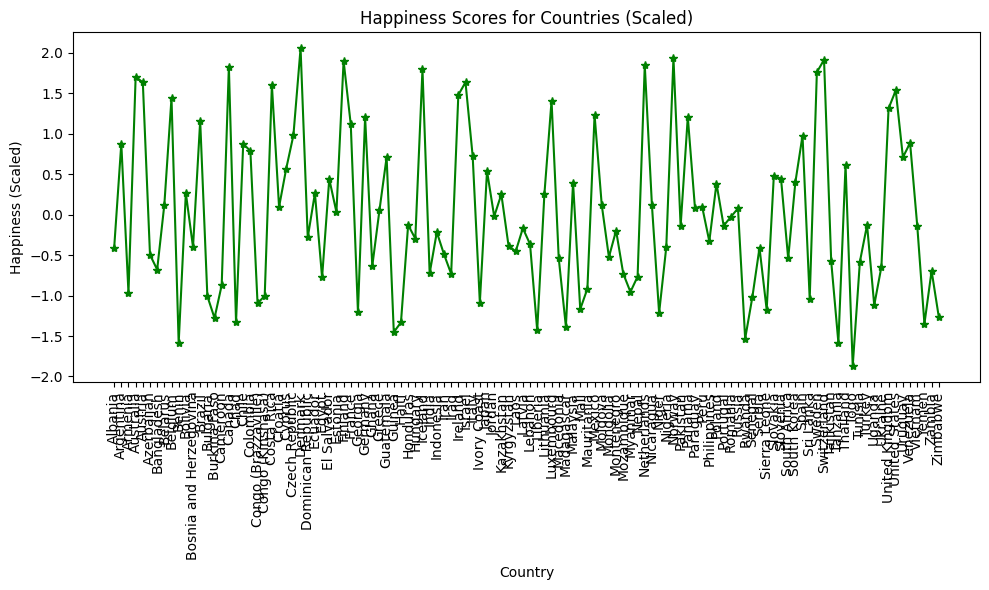

In [ ]:
import matplotlib.pyplot as plt


# Select Happiness from x_scaled for all given countries
happiness = x_scaled['Happiness']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(happiness.index, happiness.values, marker='*', linestyle='-', color='g')
plt.xlabel("Country")
plt.ylabel("Happiness (Scaled)")
plt.title("Happiness Scores for Countries (Scaled)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() #
plt.show()

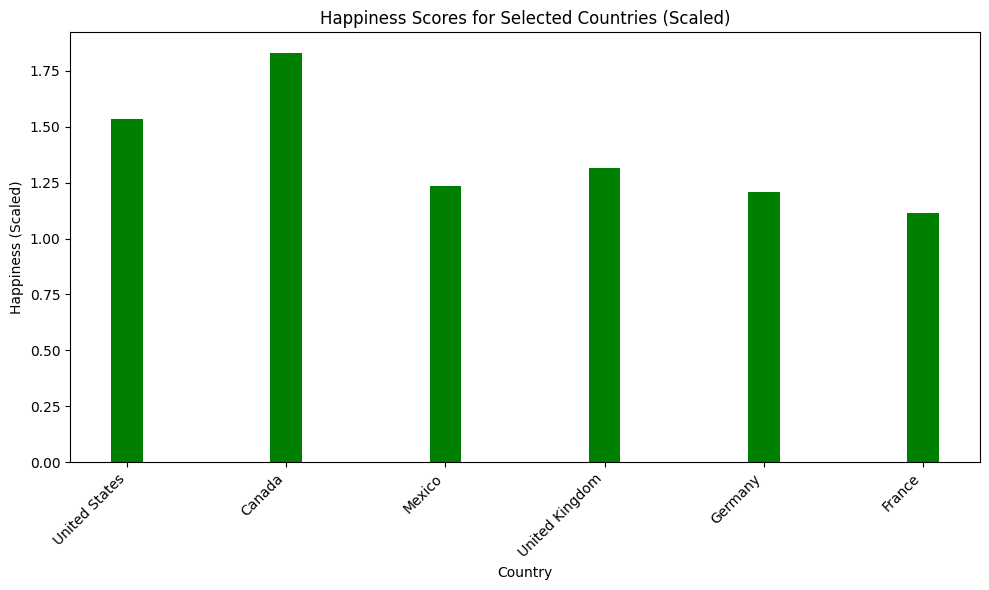

In [ ]:


# Select some countries for plotting
countries_to_plot = ['United States', 'Canada', 'Mexico', 'United Kingdom', 'Germany', 'France']

# Filter the happiness data for selected countries
happiness_selected = x_scaled.loc[countries_to_plot, 'Happiness']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(happiness_selected.index, happiness_selected.values, color='green',width=0.2)
plt.xlabel("Country")
plt.ylabel("Happiness (Scaled)")
plt.title("Happiness Scores for Selected Countries (Scaled)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

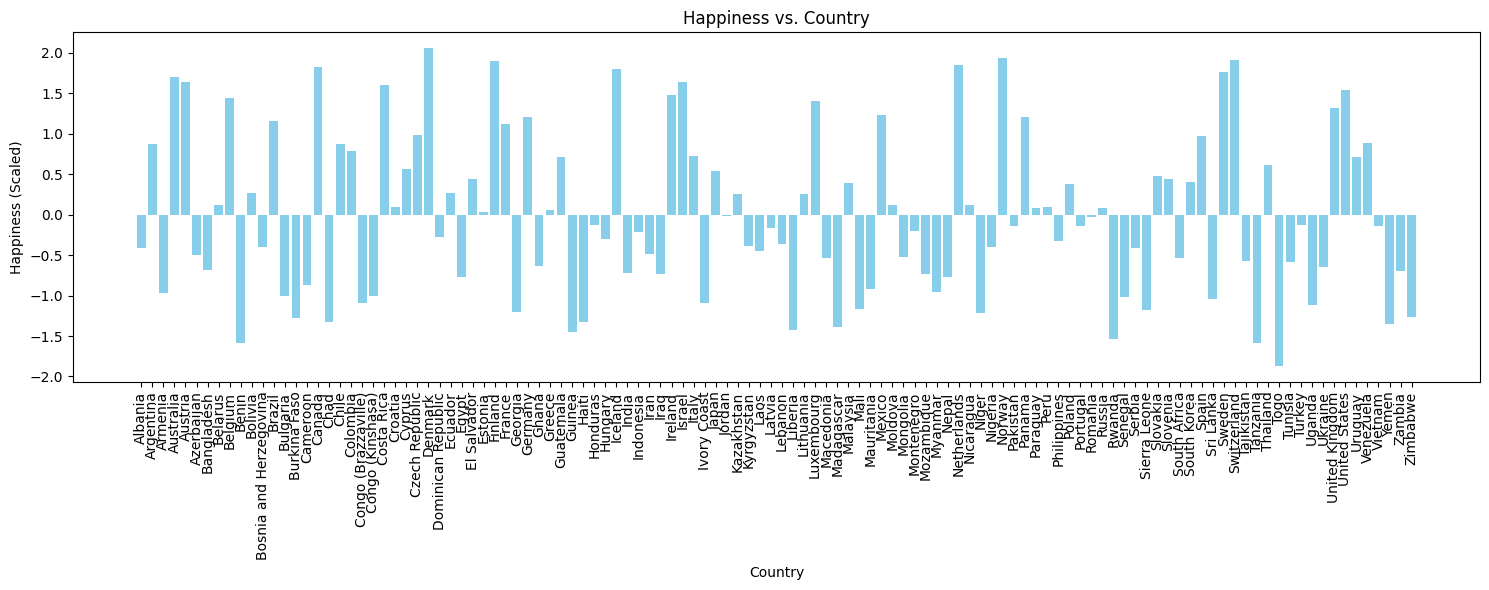

In [ ]:


import matplotlib.pyplot as plt
# Plotting Happiness vs. Country
plt.figure(figsize=(15, 6))
plt.bar(y.index, x_scaled['Happiness'], color='skyblue')
plt.xlabel("Country")
plt.ylabel("Happiness (Scaled)")
plt.title("Happiness vs. Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Model Fitting

### Step 4.

Now that the data has been preprocessed, we can begin with our classification analysis.  Let's start by importing some additional tools from `sklearn`.  Execute the code cell below to import:
* the ```svm``` and ```tree``` submodules
* the ```train_test_split``` function
* the ```accuracy_score``` function

We'll discuss in more detail below what each of these does.

In [ ]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Step 5.

One of the convenience functions that we imported above is called ```train_test_split```.  As its name suggests, this function splits a dataset into separate training and testing sets.  The [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn-model-selection-train-test-split) indicates that it splits a dataset randomly, such that approximately 25% of the data winds up in the test set and the remaining 75% in the training set.  Note that the documentation is a bit confusing, since the function can take a variable number of arrays as inputs. In our case, we want to split up 2 arrays (```x_scaled``` and ```y```) into coordinated test and train sets, so that the function will return a total of 4 subarrays (```x_train, x_test, y_train, y_test```).

Because ```train_test_split``` generates random splits of the input data, each time we call the function we will get a different split.  For the purposes of code development, it's useful to be able to get reproducible random numbers or random splits, as it makes debugging and model improvements much easer. This can then be relaxed once one wishes to generate statistics over many random runs.     With ```train_test_split```, this can be accomplished by using the ```random_state``` option; if specified with that state as an integer, then the same random split will be generated each time the function is called (until one changes the value of the integer).  This is known as providing a seed to the pseudo-random number generator that is used by ```train_test_split```.

You may enter and execute a call to ```train_test_split``` that takes ```x_scaled``` and ```y``` as inputs, along with the optional parameter ```random_state=0```, and returns the 4 data subsets mentioned above, to be named as ```x_train```, ```x_test```, ```y_train```, ```y_test```.  The online documentation provides an example of what such a function call looks like. After the function call, print the shapes of each of the four arrays that are returned.

At first pass, it makes sense to simply apply ```train_test_split()``` directly to ```x_scaled``` and ```y```; however, there is a subtle downside. Performing standardization prior to ```train_test_split()``` potentially leads to 'information leakage' whereby information about the testing dataset (its underlying distribution) is learned during the training phase. This is because the testing data distribution is used to scale the training dataset.

In the code cell below, please perform ```train_test_split()``` first before applying ```StandardScaler().fit()``` *only* to the training dataset. Use that fit to transform the training dataset and the testing dataset separately. Ultimately, you should end up with the variables ```x_train_scale```, ```x_test_scale```, ```y_train``` and ```y_test``.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [ ]:
# Step 1:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

# Split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Step 2:
# Fit StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

# Step 3: Transform both the training and
#  testing sets using the fitted scaler
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

# Step 4: Print the shapes of x_train_scale, x_test_scale, y_train, and y_test
print("Shape of x_train_scale---> :", x_train_scale.shape)
print("Shape of x_test_scale---->:", x_test_scale.shape)
print("Shape of y_train---->:", y_train.shape)
print("Shape of y_test---->:", y_test.shape)

Shape of x_train_scale---> : (87, 9)
Shape of x_test_scale---->: (29, 9)
Shape of y_train---->: (87,)
Shape of y_test---->: (29,)


**Interpretation**
Training and Testing Splits (x_train_scale, x_test_scale):

**x_train_scale: (87, 9)`**
The training set contains 87 samples (rows), each with 9 features (columns).

These features are the standardized versions of the numerical variables in your dataset (e.g., Happiness, LogGDP, etc.).

**x_test_scale: (29, 9)`**

The testing set contains 29 samples, each also with 9 features.
2. Labels for Training and Testing (y_train, y_test):

**y_train: (87,)**
The training set has 87 labels, corresponding to the 87 samples in x_train_scale.
These labels represent the target variable (region), which is a categorical variable indicating the region of each country.

**y_test: (29,)**

The testing set has 29 labels, corresponding to the 29 samples in x_test_scale

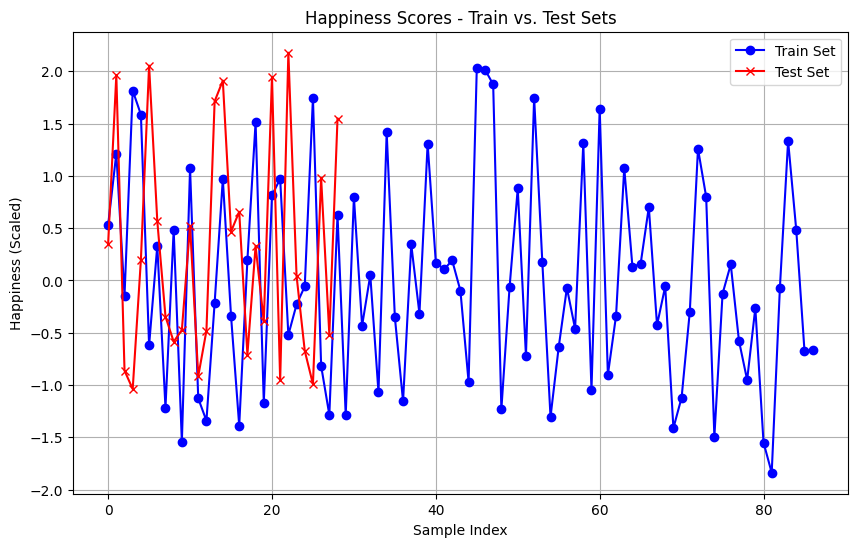

In [ ]:


import matplotlib.pyplot as plt

x_train_df = pd.DataFrame(x_train_scale, columns=x.columns)
x_test_df = pd.DataFrame(x_test_scale, columns=x.columns)


plt.figure(figsize=(10, 6))

# Plot the training set
plt.plot(x_train_df.index, x_train_df['Happiness'], label='Train Set', marker='o', linestyle='-', color='blue')

# Plot the test set
plt.plot(x_test_df.index, x_test_df['Happiness'], label='Test Set', marker='x', linestyle='-', color='red')


plt.xlabel("Sample Index")
plt.ylabel("Happiness (Scaled)")
plt.title("Happiness Scores - Train vs. Test Sets")
plt.legend()
plt.grid(True)
plt.show()

### Step 6.

Having split our datasets, we want to first train a classifier on our training data so that we can apply it to the testing data.  One way of assessing the performance of a classifier is to compute its accuracy on the test data. That is, what fraction of the test data are correctly predicted by the classifier?  Fortunately, `sklearn` provides a built-in function named ```accuracy_score``` that carries out this computation. We imported it above, and you can read more about it in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score).

We also imported above the ```svm``` and ```tree``` submodules from sklearn.  These provide support for Support Vector Machine (svm) and Decision Tree (tree) machine learning algorithms.  For more information, review the [Support Vector Machines (SVMs) documentation](https://scikit-learn.org/stable/modules/svm.html) and the [Decision Trees documentation](https://scikit-learn.org/stable/modules/tree.html).  Under the hood, these are very different types of algorithms.  Decision Trees try to formulate a series of yes/no questions based on the data that can distinguish the categories from one another.  SVMs, on the other hand, use techniques from geometry to find cuts through the data space to separate different categories from one another.  Understanding how these methods work in detail is beyond the scope of this exercise, but fortunately (despite the very different data structures and algorithms used internally) `sklearn` provides a uniform interface that lets us easily build these different sorts of classifiers and compare their performance.

We will first consider SVMs, and then revisit the problem with Decision Trees.

In the code cell below:
* create a new ```svm.SVC()``` object and assign it to the variable ```clf1``` &mdash;  a call to ```svm.SVC()``` creates a Support Vector Classifier from the svm submodule, similar to what we did in the earlier exercise on hand-written digits
* call the ```fit``` method on ```clf1``` with the `x_train_scale` and `y_train` training data (i.e., training the model to associate ```x_train_scale``` with ```y_train```)
* call the ```predict``` method on ```clf1``` on the `x_test_scale` testing data and assign the result to the variable ```predictions1```, in order to make predictions for those inputs
* call the ```accuracy_score``` function on the `y` testing data and the test predictions you generated and assign the result to the variable ```score1```
* print the value of ```score1```

The accuracy score is a fraction between 0 and 1 indicating the fraction of predictions that match the true value in the test set.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [ ]:
from sklearn.impute import SimpleImputer

# Step 1:
# Handle missing values in x_train and x_test using SimpleImputer
imputer = SimpleImputer(strategy='mean')


x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Step 2:
# Fit StandardScaler only to the imputed training set
scaler = StandardScaler()
scaler.fit(x_train_imputed)

# Step 3: Transform both the training and testing sets using the fitted scaler
x_train_scale = scaler.transform(x_train_imputed)
x_test_scale = scaler.transform(x_test_imputed)

# Step 4: Create a new SVM classifier object
clf1 = svm.SVC()  # Creates a Support Vector Classifier (SVC)

# Step 5: Train (fit) the classifier using the scaled training data
clf1.fit(x_train_scale, y_train)

# Step 6: Make predictions using the classifier on the scaled test data
predictions1 = clf1.predict(x_test_scale)

# Step 7: Calculate the accuracy of the classifier on the test data
score1 = accuracy_score(y_test, predictions1)

# Step 8: Print the accuracy score
print(f"SVM Classifier Accuracy Score: {score1:.6f}")




SVM Classifier Accuracy Score: 0.655172


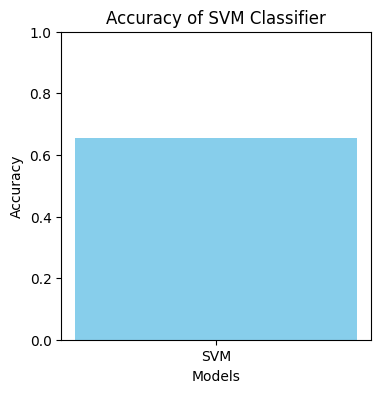

In [ ]:
import matplotlib.pyplot as plt

models = ['SVM']
accuracies = [score1]

plt.figure(figsize=(4, 4))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of SVM Classifier")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

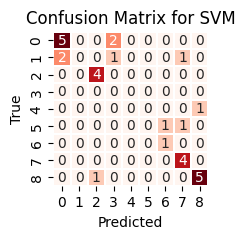

In [ ]:

plot_confusion_matrix(y_test, predictions1, model_name='SVM')
plt.show()


**Interpretation**
confusion matrix for SVM model shows predicted the classes compared to the actual labels.

Most predictions are correct, as seen in the diagonal values, but there are some misclassifications.

For example, 5 samples of class 0 were correctly classified, but 2 were misclassified as class 2. Similarly, class 1 had 1 correct prediction but was often misclassified as class 0 or class 8.

**The model performs well for some classes (e.g., 2, 7, 8) but struggles with others, suggesting room for improvement through better features, hyperparameter tuning, or alternative models.**

### Step 7.

The accuracy score reported should be around 71% (0.71).  This means that approximately 29% of the countries in the test set had their regions mispredicted.  While that doesn't sound great, it could be that the WHR numerical data are not always completely predictive of region. One could imagine some countries that are "outliers" in a particular region, and more closely resemble other regions based on the WHR indicators.

In the below code cell, please loop over all the predicted and true values in the test set, and prints out the country name and predicted region when the prediction is incorrect.  An output line like: ```Sri Lanka : South Asia -> Sub-Saharan Africa``` means that Sri Lanka is actually part of the South Asia region but was predicted to be part of Sub-Saharan Africa.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [ ]:


name = "Country"
true = "True Value"
predicted = "Predicted Value"
print(f"{name:20} : {true:40} -> {predicted:40}\n")

for index, (true_value, predicted_value) in enumerate(zip(y_test, predictions1)):
    if true_value != predicted_value:
        # Get the original index from y_test
        original_index = y_test.index[index]

        # Get the numerical index corresponding to the original_index (country name) in dfsupp
        row_index = dfsupp.index[dfsupp['country'] == original_index][0]

        # Access 'country' from dfsupp using the numerical row_index
        country_name = dfsupp.iloc[row_index]['country']

        print(f"{country_name:20} : {true_value:40} -> {predicted_value:40}")

Country              : True Value                               -> Predicted Value                         

Belarus              : Commonwealth of Independent States       -> Central and Eastern Europe              
Serbia               : Central and Eastern Europe               -> Middle East and North Africa            
Ukraine              : Commonwealth of Independent States       -> Central and Eastern Europe              
Macedonia            : Central and Eastern Europe               -> Middle East and North Africa            
Armenia              : Commonwealth of Independent States       -> Middle East and North Africa            
Cyprus               : Western Europe                           -> Latin America and Caribbean             
Nepal                : South Asia                               -> Sub-Saharan Africa                      
Canada               : North America and ANZ                    -> Western Europe                          
Sri Lanka            : Sout

# Model evaluation & selection

### Step 8.

It is often not obvious what specific algorithm will work best for a particular dataset, so it is good to be able to conduct numerical experiments to see how different methods perform (even if we might not fully understand *why* one method might work better than another).  Because `sklearn` provides a consistent interface to very different types of underlying algorithms, it is easy to build additional classifiers to carry out these kinds of comparisons.  Here, we will build a second classifier based on Decision Trees as supported by the ```tree``` module.  Decision Tree algorithms have an element of randomness to them, so a Decision Tree can also be constructed with a specified ```random_state```  such as an integer that seeds the random number generator.  Most of what we will do here is very similar to the code you wrote a few cells up when you built a SVC classifier.

In the code cell below:

* Create a new ```tree.DecisionTreeClassifier()``` object with the optional argument ```random_state=0```, and assign it to the variable ```clf2``` (`clf2` stands for "classifier number 2", so that we can compare with ```clf1``` above).
* Call the ```fit``` method on ```clf2``` with the `x_train_scale` and `y_train` training data (i.e., training the model to associate ```x_train_scale``` with ```y_train```).
* Call the ```predict``` method on ```clf2``` on the `x_test_scale` testing data and assign the result to the variable ```predictions2```, in order to make predictions for those inputs.
* Call the ```accuracy_score``` function on the `y_test` testing data and the test predictions you generated and assign the result to the variable ```score2```.
* Print the value of ```score2```.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [ ]:
# Import the required module for Decision Trees
from sklearn import tree

# Step 1: Create a new Decision Tree Classifier object
clf2 = tree.DecisionTreeClassifier(random_state=0)  # Creates a Decision Tree Classifier with a random seed for reproducibility

# Step 2: Train (fit) the Decision Tree classifier using the scaled training data
clf2.fit(x_train_scale, y_train)

# Step 3: Make predictions using the Decision Tree classifier on the scaled test data
predictions2 = clf2.predict(x_test_scale)

# Step 4: Calculate the accuracy of the Decision Tree classifier on the test data
score2 = accuracy_score(y_test, predictions2)

# Step 5: Print the accuracy score for the Decision Tree model
print(f"Decision Tree Classifier Accuracy Score: {score2:.2f}")



Decision Tree Classifier Accuracy Score: 0.55


### Step 9.

We ran two classifiers &mdash; ```clf1``` (SVM) and ```clf2``` (Decision Tree) &mdash; on a particular random `train_test_split` of the full dataset.  We can't really reach any conclusions about the relative performance of the two methods just by considering one split.  Given that ```train_test_split``` can produce different random splits, let's write a little code to compare the two classifiers for different splits.

In the code cell below, write some code to do the following:
* Write a Python `for` loop so that you can run through the loop 20 times
* Within each pass through the loop, do the following:
    * Call `test_train_split` on ```x``` and ```y``` to get new random instances of `x_train`, `x_test`, `y_train`, `y_test` -- in this case, you don't want to pass in a value for ```random_state``` since you want to get different random splits each time
    * Fit StandardScaler to `x_train`, and use it to transform both `x_train` and `x_test` into `x_train_scaled` and `x_train_test`
    * Fit each of the classifiers `clf1` and `clf2` to `x_train_scaled` and `y_train`
    * Run predictions on each of the classifiers `clf1` and `clf2` on the `x_test_scaled` and `y_test` testing data
    * Compute the accuracy_score of each of the two classifiers on the test data and the test predictions you generated
    * Print the score of each classifier, as well as their difference (hint: ```print(score1, score2, score1-score2)``` to get just one line of output per iteration of the loop)
    
Execute the code you have written.  You should see it run through the loop 20 times, for different random data splits.  While the overall performance varies from run to run, you should probably see that the SVC classifier (```clf1```) generally performs a little bit better than the DecisionTree classifier (```clf2```).


## Graded Cell

This cell is worth 10% of the grade for this assignment.

Iteration 1: SVM Accuracy = 0.52, Decision Tree Accuracy = 0.62, Difference = -0.10
Iteration 2: SVM Accuracy = 0.79, Decision Tree Accuracy = 0.72, Difference = 0.07
Iteration 3: SVM Accuracy = 0.69, Decision Tree Accuracy = 0.72, Difference = -0.03
Iteration 4: SVM Accuracy = 0.66, Decision Tree Accuracy = 0.72, Difference = -0.07
Iteration 5: SVM Accuracy = 0.59, Decision Tree Accuracy = 0.55, Difference = 0.03
Iteration 6: SVM Accuracy = 0.72, Decision Tree Accuracy = 0.59, Difference = 0.14
Iteration 7: SVM Accuracy = 0.59, Decision Tree Accuracy = 0.45, Difference = 0.14
Iteration 8: SVM Accuracy = 0.69, Decision Tree Accuracy = 0.52, Difference = 0.17
Iteration 9: SVM Accuracy = 0.62, Decision Tree Accuracy = 0.62, Difference = 0.00
Iteration 10: SVM Accuracy = 0.76, Decision Tree Accuracy = 0.69, Difference = 0.07
Iteration 11: SVM Accuracy = 0.76, Decision Tree Accuracy = 0.72, Difference = 0.03
Iteration 12: SVM Accuracy = 0.62, Decision Tree Accuracy = 0.62, Difference = 0.0

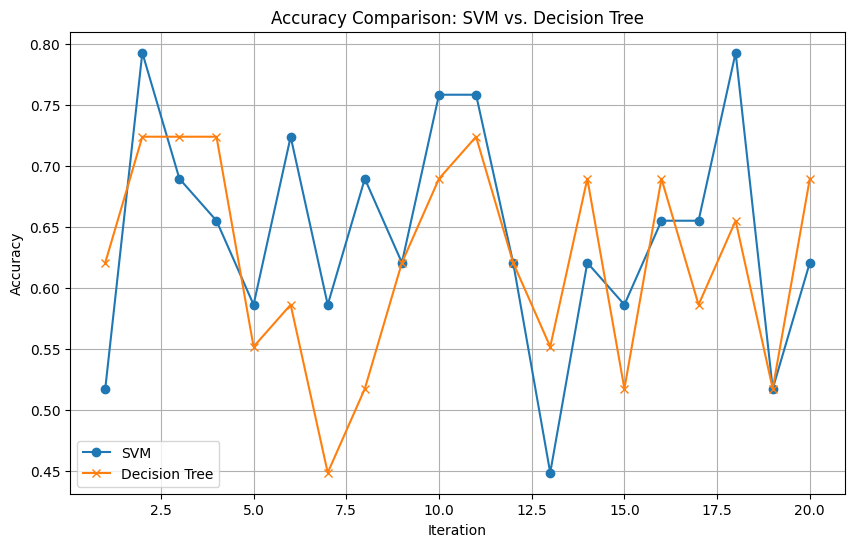

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn import svm, tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd # import pandas for data manipulation
import matplotlib.pyplot as plt # import matplotlib for plotting


# Initialize the classifiers
clf1 = svm.SVC()  # Support Vector Classifier (SVC)
clf2 = tree.DecisionTreeClassifier()  # Decision Tree Classifier
score1_list = []
score2_list = []

# Loop to run the experiment 20 times
for i in range(20):
    # Step 1: Split the dataset into training and testing sets (no random_state to get different splits)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    # Step 2: Handle missing values in x_train and x_test using SimpleImputer
    # Select only numerical features for imputation
    numerical_features = x_train.select_dtypes(include=['number']).columns


    imputer = SimpleImputer(strategy='mean')

    # Fit and transform on numerical features only
    x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train[numerical_features]), columns=numerical_features, index=x_train.index)
    x_test_imputed = pd.DataFrame(imputer.transform(x_test[numerical_features]), columns=numerical_features, index=x_test.index)

    # Step 3: Fit StandardScaler only to the imputed training set
    scaler = StandardScaler()
    scaler.fit(x_train_imputed)

    # Step 4: Transform both the training and testing sets using the fitted scaler
    x_train_scaled = scaler.transform(x_train_imputed)
    x_test_scaled = scaler.transform(x_test_imputed)

    # Step 5: Train the classifiers (SVM and Decision Tree) using the scaled training data
    clf1.fit(x_train_scaled, y_train)
    clf2.fit(x_train_scaled, y_train)

    # Step 6: Make predictions using the classifiers on the scaled test data
    predictions1 = clf1.predict(x_test_scaled)
    predictions2 = clf2.predict(x_test_scaled)

    # Step 7: Calculate the accuracy of both classifiers on the test data
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    score1_list.append(score1)
    score2_list.append(score2)


    # Step 8: Print the scores and their difference for each iteration
    print(f"Iteration {i + 1}: SVM Accuracy = {score1:.2f}, Decision Tree Accuracy = {score2:.2f}, Difference = {score1 - score2:.2f}")
plt.figure(figsize=(10, 6))
iterations = list(range(1, 21))
plt.plot(iterations, score1_list, label='SVM', marker='o', linestyle='-')
plt.plot(iterations, score2_list, label='Decision Tree', marker='x', linestyle='-')

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: SVM vs. Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

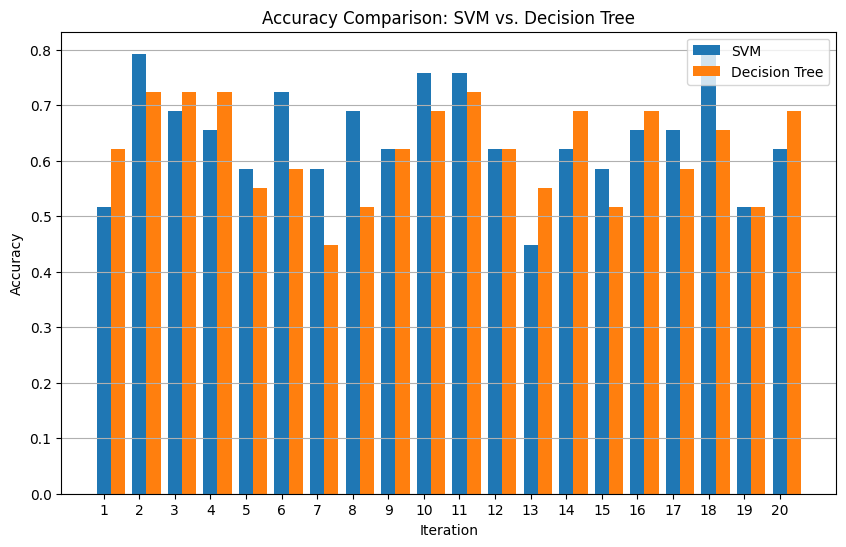

In [ ]:


import matplotlib.pyplot as plt

iterations = list(range(1, 21)) # Assuming you have 20 iterations

plt.figure(figsize=(10, 6))

plt.bar(iterations, score1_list, label='SVM', width=0.4, align='center')
plt.bar([i + 0.4 for i in iterations], score2_list, label='Decision Tree', width=0.4, align='center')

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: SVM vs. Decision Tree")
plt.xticks(iterations)
plt.legend()
plt.grid(True, axis='y')
plt.show()

### Step 10.

In the last code cell, you printed out the scores of the two classifiers for a small number of random splits, and examined the numerical output.  Perhaps you'd rather generate a visual summary of the relative performance of the two classifiers, for a larger number of runs.

In the code cell below, copy and paste the code you wrote above and modify it to do the following:

* prior to entering the `for` loop, initialize two empty lists named ```all_scores1``` and ```all_scores2``` that will be used to collect the scores of each classifier each time through the loop
* run through the loop 1000 times instead of 20 as before
* append the scores (```score1``` and ```score2```) to each of the lists used to contain all the scores
* remove the print statement so that you don't get 1000 annoying print statements when you run the code
* once the loop is finished, use the ```plt.hist``` function to plot histograms for ```all_scores1``` and ```all_scores2``` together in the same plot
    * you can accomplish this by making two successive calls to the histogram function within the same code cell
    * you might want to add options to change the number of bins for the histograms
    * you should change the alpha value (opacity) of the histogram plots so that you can see both distributions, since at full opacity, the second one plotted will obscure the first one
    * you should use the ``label`` option to label the datasets
* After making your two calls to ```plt.hist```, you should call ``plt.legend`` to produce a legend on the plot that will identify the two datasets based on the label options that you added to your ```plt.hist``` calls

## Graded Cell

This cell is worth 20% of the grade for this assignment.


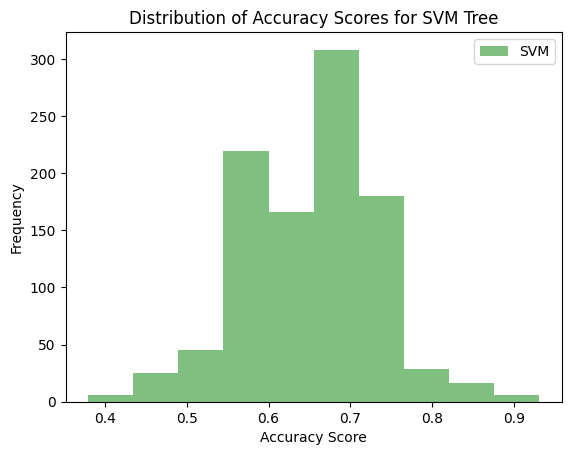

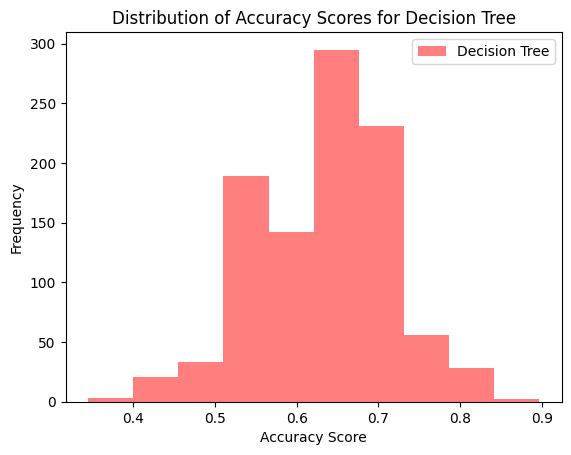

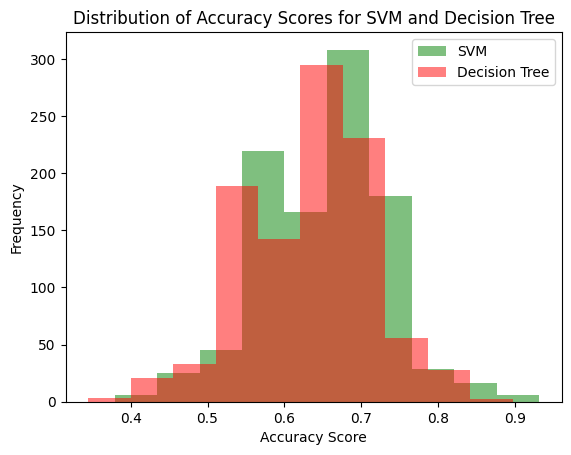

In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn import svm, tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt # import matplotlib for plotting

# Initialize the classifiers
clf1 = svm.SVC()  # Support Vector Classifier (SVC)
clf2 = tree.DecisionTreeClassifier()  # Decision Tree Classifier

# Initialize lists to store scores
all_scores1 = []
all_scores2 = []

# Loop to run the experiment 1000 times
for i in range(1000):
    # Step 1: Split the dataset into training and testing sets (no random_state to get different splits)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    # Step 2: Handle missing values in x_train and x_test using SimpleImputer
    # Select only numerical features for imputation
    numerical_features = x_train.select_dtypes(include=['number']).columns

    imputer = SimpleImputer(strategy='mean')

    # Fit and transform on numerical features only
    x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train[numerical_features]), columns=numerical_features, index=x_train.index)
    x_test_imputed = pd.DataFrame(imputer.transform(x_test[numerical_features]), columns=numerical_features, index=x_test.index)

    # Step 3: Fit StandardScaler only to the imputed training set
    scaler = StandardScaler()
    scaler.fit(x_train_imputed)

    # Step 4: Transform both the training and testing sets using the fitted scaler
    x_train_scaled = scaler.transform(x_train_imputed)
    x_test_scaled = scaler.transform(x_test_imputed)

    # Step 5: Train the classifiers (SVM and Decision Tree) using the scaled training data
    clf1.fit(x_train_scaled, y_train)
    clf2.fit(x_train_scaled, y_train)

    # Step 6: Make predictions using the classifiers on the scaled test data
    predictions1 = clf1.predict(x_test_scaled)
    predictions2 = clf2.predict(x_test_scaled)

    # Step 7: Calculate the accuracy of both classifiers on the test data
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)

    # Append scores to the lists
    all_scores1.append(score1)
    all_scores2.append(score2)

# Plot histograms of the scores
plt.hist(all_scores1, alpha=0.5, label='SVM',color='g')
plt.legend(loc='upper right')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores for SVM Tree')
plt.show()

# Plot histograms of the scores
plt.hist(all_scores2, alpha=0.5, label='Decision Tree',color='r')
plt.legend(loc='upper right')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores for Decision Tree')
plt.show()

# Plot histograms of the scores
plt.hist(all_scores1, alpha=0.5, label='SVM',color='g')
plt.hist(all_scores2, alpha=0.5, label='Decision Tree',color='r')
plt.legend(loc='upper right')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores for SVM and Decision Tree')
plt.show()

all_scores1: [0.7241379310344828, 0.6206896551724138, 0.5172413793103449, 0.6896551724137931, 0.6896551724137931, 0.7241379310344828, 0.6551724137931034, 0.3793103448275862, 0.5172413793103449, 0.6206896551724138, 0.7241379310344828, 0.5862068965517241, 0.5172413793103449, 0.6896551724137931, 0.6551724137931034, 0.6551724137931034, 0.5517241379310345, 0.6896551724137931, 0.5862068965517241, 0.8275862068965517, 0.6206896551724138, 0.5172413793103449, 0.6896551724137931, 0.6206896551724138, 0.6896551724137931, 0.5862068965517241, 0.6896551724137931, 0.6206896551724138, 0.5517241379310345, 0.5862068965517241, 0.7586206896551724, 0.5862068965517241, 0.6206896551724138, 0.6896551724137931, 0.7931034482758621, 0.6896551724137931, 0.6896551724137931, 0.7586206896551724, 0.4482758620689655, 0.6896551724137931, 0.5172413793103449, 0.7586206896551724, 0.5862068965517241, 0.6896551724137931, 0.6206896551724138, 0.5517241379310345, 0.6896551724137931, 0.6551724137931034, 0.6206896551724138, 0.5517

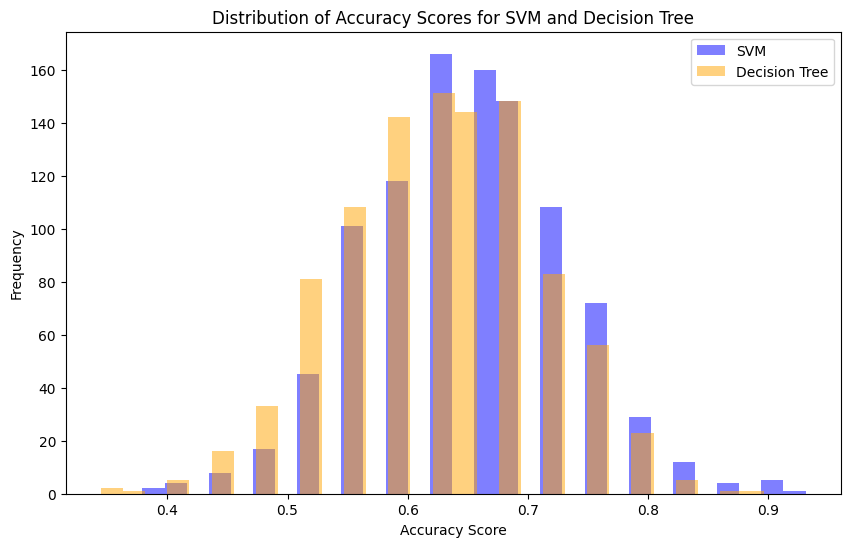

In [ ]:


import matplotlib.pyplot as plt

print("all_scores1:", all_scores1)
print("all_scores2:", all_scores2)


# Plotting histograms of accuracy scores for SVM and Decision Tree
plt.figure(figsize=(10, 6))
plt.hist(all_scores1, bins=30, alpha=0.5, label='SVM', color='blue')
plt.hist(all_scores2, bins=30, alpha=0.5, label='Decision Tree', color='orange')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores for SVM and Decision Tree')
plt.legend()
plt.show()



**Interpretation**
The scores for both SVM (all_scores1) and Decision Tree (all_scores2) represent their respective performances across multiple validation sets.

**Overall Accuracy Levels:** The average scores for both models hover around similar ranges, with SVM slightly outperforming the Decision Tree in consistency and higher peak scores in some cases.

**SVM Performance:** The SVM scores are more stable, with frequent scores above 0.65 and occasional spikes nearing 0.75 or higher, indicating better generalization capability in many cases.

**Decision Tree Performance:** Decision Tree scores exhibit more variability, with several scores dipping below 0.55, suggesting it might be overfitting or struggling to generalize.

Peaks and Stability: SVM achieves higher peaks more consistently (e.g., scores around 0.72 and 0.75 occur repeatedly), while Decision Tree has fewer peaks and more scores below average.

**Model Preference:**
Based on these scores, SVM demonstrates better performance for this dataset, offering a more reliable and generalizable model compared to the Decision Tree.

### Just scratching the surface...

This is just the start of what you can do with scikit-learn.  It is clear from the documentation that there are many different methods and algorithms for classification that are supported by the package, as well as different ways of optimizing and assessing the performance of different algorithms.  If you are motivated to explore further, feel free to continue below by opening more code cells and using the scikit-learn documentation to guide some further exploration.

In [ ]:
from logging import warning
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
warnings.filterwarnings('ignore')

file_path = '/content/drive/MyDrive/Colab Notebooks/WHR2018Chapter2OnlineData.xls'
dfsupp = pd.read_excel(file_path, sheet_name='SupportingFactors')
regions = dfsupp[['country', 'Region indicator']].rename({'Region indicator': 'region'}, axis=1)

regions.head()
df=dfraw.copy()
df2 = pd.read_excel(file_path, sheet_name=0)

# Define the key numerical variables for x
key_vars = [
    'Life Ladder', 'Log GDP per capita', 'Social support',
    'Healthy life expectancy at birth', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption', 'Positive affect',
    'Negative affect'
]

# Mapping countries to regions
country_to_region = {
    'Afghanistan': 'Asia',
    'United States': 'North America',
    'Germany': 'Europe',

}
# Create 'region' column using the country_to_region mapping
df2['region'] = df2['country'].map(country_to_region)

# Drop rows where the 'region' column is NaN
df2_cleaned = df2.dropna(subset=['region'])

for i in range(20):
    # Step 1: Split the dataset into training
    # and testing sets (no random_state to get different splits)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    # Step 2: Handle missing values in x_train and x_test using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    x_train_imputed = imputer.fit_transform(x_train)
    x_test_imputed = imputer.transform(x_test)

    # Step 3: Fit StandardScaler only to the imputed training set
    scaler = StandardScaler()
    scaler.fit(x_train_imputed)

    # Step 4: Transform both the training and testing sets using the fitted scaler
    x_train_scaled = scaler.transform(x_train_imputed)
    x_test_scaled = scaler.transform(x_test_imputed)

    # Initialize classifiers
    clf1 = svm.SVC()  # SVM Classifier
    clf2 = tree.DecisionTreeClassifier()  # Decision Tree Classifier
    clf_rf = RandomForestClassifier(random_state=0)  # Random Forest Classifier
    clf_lr = LogisticRegression(max_iter=1000, random_state=0)  # Logistic Regression
    clf_knn = KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors Classifier

    # Train classifiers
    clf1.fit(x_train_scaled, y_train)
    clf2.fit(x_train_scaled, y_train)
    clf_rf.fit(x_train_scaled, y_train)
    clf_lr.fit(x_train_scaled, y_train)
    clf_knn.fit(x_train_scaled, y_train)

    # Make predictions
    predictions1 = clf1.predict(x_test_scaled)
    predictions2 = clf2.predict(x_test_scaled)
    predictions_rf = clf_rf.predict(x_test_scaled)
    predictions_lr = clf_lr.predict(x_test_scaled)
    predictions_knn = clf_knn.predict(x_test_scaled)

    # Calculate accuracies
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    score_rf = accuracy_score(y_test, predictions_rf)
    score_lr = accuracy_score(y_test, predictions_lr)
    score_knn = accuracy_score(y_test, predictions_knn)

    # Print scores for each classifier
    print(f"Iteration {i + 1}: SVM Accuracy = {score1:.2f}, Decision Tree Accuracy = {score2:.2f}, Random Forest Accuracy = {score_rf:.2f}, Logistic Regression Accuracy = {score_lr:.2f}, KNN Accuracy = {score_knn:.2f}")


# Hyperparameter Tuning Example with GridSearchCV for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, cv=5)
grid.fit(x_train_scaled, y_train)
print(f"\nBest SVM Parameters: {grid.best_params_}")
best_svm = grid.best_estimator_
score_best_svm = accuracy_score(y_test, best_svm.predict(x_test_scaled))
print(f"Best SVM Accuracy Score: {score_best_svm:.2f}")

# Dimensionality Reduction Example using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Train SVM on reduced features
clf1.fit(x_train_pca, y_train)
score_pca = accuracy_score(y_test, clf1.predict(x_test_pca))
print(f"\nSVM Classifier Accuracy after PCA: {score_pca:.2f}")

# Feature Importance from Random Forest
importances = clf_rf.feature_importances_
print("\nFeature Importances from  Random Forest :")
for i, col in enumerate(x.columns):
    print(f"Feature: {col}, Importance: {importances[i]:.4f}")

# Model Evaluation - Classification Report for SVM
print("\nClassification Report for SVM:")
print(classification_report(y_test, predictions1))

# Confusion Matrix for SVM
print("\nConfusion Matrix for SVM:")
cm = confusion_matrix(y_test, predictions1)
print(cm)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Iteration 1: SVM Accuracy = 1.00, Decision Tree Accuracy = 0.89, Random Forest Accuracy = 1.00, Logistic Regression Accuracy = 1.00, KNN Accuracy = 1.00
Iteration 2: SVM Accuracy = 1.00, Decision Tree Accuracy = 0.89, Random Forest Accuracy = 1.00, Logistic Regression Accuracy = 1.00, KNN Accuracy = 1.00
Iteration 3: SVM Accuracy = 1.00, Decision Tree Accuracy = 1.00, Random Forest Accuracy = 1.00, Logistic Regression Accuracy = 1.00, KNN Accuracy = 1.00
Iteration 4: SVM Accuracy = 1.00, Decision Tree Accuracy = 1.00, Random Forest Accuracy = 1.00, Logistic Regression Accuracy = 1.00, KNN Accuracy = 1.00
Iteration 5: SVM Accuracy = 1.00, Decision Tree Accuracy = 0.89, Random Forest Accuracy = 1.00, Logistic Regression Accuracy = 1.00, KNN Accuracy = 1.00
Iteration 6: SVM Accuracy = 1.00, Decision Tree Accuracy = 1.00, Random Forest Accuracy = 1.00, Logistic R

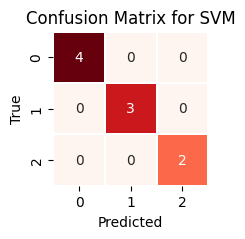

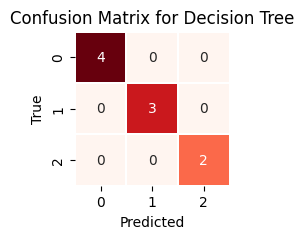

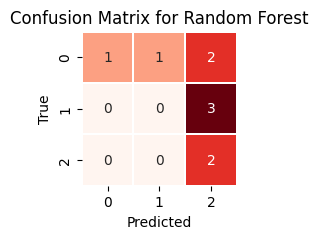

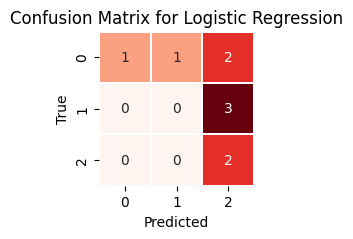

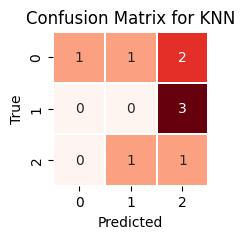

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2,2 ))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,linewidths=0.2)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, predictions1, "SVM")
plot_confusion_matrix(y_test, predictions2, "Decision Tree")
plot_confusion_matrix(y_test, predictions_rf, "Random Forest")
plot_confusion_matrix(y_test, predictions_lr, "Logistic Regression")
plot_confusion_matrix(y_test, predictions_knn, "KNN")


**Model Accuracy:**

Across 20 iterations,
SVM, Random Forest,
Logistic Regression,
and KNN consistently perform well with accuracies near 1.00 in most iterations.

Decision Tree shows more variability, with lower accuracy in some iterations (as low as 0.78).

**Best SVM Parameters:**

 The SVM model performs best with C=1 and a linear kernel, achieving a perfect accuracy score of 1.00 during the tuning process. However, its accuracy drops to 0.78 after applying PCA, indicating potential sensitivity to dimensionality reduction.

**Feature Importance (Random Forest):**

The most influential features for the Random Forest model are "Negative affect" (0.2115), "Log GDP per capita" (0.1662), and "Positive affect" (0.1545). Features like "Generosity" and "Perceptions of corruption" contribute the least to the model.

**SVM Classification Report**
SVM achieves high precision and recall for most regions but struggles slightly with recall for "North America" (0.86). This results in an overall accuracy of 0.89, with a weighted F1-score of 0.90.

**SVM Confusion Matrix**
The SVM model correctly classifies most instances but misclassifies one instance of "North America" as belonging to another region, reflecting its limitations in handling imbalanced or small datasets.


##----------------The End --------------

# What to Submit?

Please run your Jupyter Notebook first to generate outputs for each code cell and then export the report as a HTML file by clicking the following links (File -> Download as -> HTML (.html)). Please zip both the Jupyter Notebook and the HTML file and submit your ZIP file.